In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd

n = 100  # Number of rows

# Generate random data
data = np.random.rand(n, 4)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Column 1', 'Column 2', 'Column 3', 'Column 4'])

# Print the dataset
print(df)

    Column 1  Column 2  Column 3  Column 4
0   0.635496  0.786891  0.892218  0.829630
1   0.390336  0.668787  0.386644  0.544857
2   0.597191  0.338435  0.183251  0.701166
3   0.731003  0.319554  0.915800  0.003882
4   0.275057  0.271680  0.326637  0.341601
..       ...       ...       ...       ...
95  0.694521  0.117341  0.919393  0.116355
96  0.018332  0.139860  0.754927  0.418209
97  0.970266  0.422265  0.903575  0.668279
98  0.084864  0.731730  0.616165  0.814312
99  0.816577  0.230278  0.260234  0.809878

[100 rows x 4 columns]


In [3]:
from sklearn.linear_model import LinearRegression as sk_LinearRegression
from linear_model.LinearRegression import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Create a Linear Regression model
model = sk_LinearRegression()
model2 = LinearRegression()


# Train the model
model.fit(df[['Column 1', 'Column 2', 'Column 3']], df['Column 4'])
model2.fit(df[['Column 1', 'Column 2', 'Column 3']].values, df['Column 4'].values)


# Predict the values
predictions = model.predict(df[['Column 1', 'Column 2', 'Column 3']])
predictions2 = model2.predict(df[['Column 1', 'Column 2', 'Column 3']])

# calculate the mean squared error and accuracy
mse = mean_squared_error(df['Column 4'], predictions)
mse2 = mean_squared_error(df['Column 4'], predictions2)
print('Mean Squared Error of sklearn:', mse)
print('Mean Squared Error of our model:', mse2)
# print('Accuracy of sklearn:', accuracy_score(df['Column 4'], predictions))
# print('Accuracy of sgd:', accuracy_score(df['Column 4'], predictions2))




Mean Squared Error of sklearn: 0.07337121050137341
Mean Squared Error of our model: 0.10953343979955456


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Linear Regression model
model = sk_LinearRegression()
model2 = LinearRegression()

# Train the model
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predict the values
predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

# calculate the mean squared error and accuracy
mse = mean_squared_error(y_test, predictions)
mse2 = mean_squared_error(y_test, predictions2)

print('Mean Squared Error of sklearn:', mse)
print('Mean Squared Error of our model:', mse2)

# print('Accuracy of sklearn:', accuracy_score(y_test, predictions))
# print('Accuracy of sgd:', accuracy_score(y_test, predictions2))

# predict the training set
predictions = model.predict(X_train)
predictions2 = model2.predict(X_train)

# calculate the mean squared error and accuracy
mse = mean_squared_error(y_train, predictions)
mse2 = mean_squared_error(y_train, predictions2)

print('Mean Squared Error of sklearn:', mse)
print('Mean Squared Error of our model:', mse2)

# print('Accuracy of sklearn:', accuracy_score(y_train, predictions))
# print('Accuracy of sgd:', accuracy_score(y_train, predictions2))

Mean Squared Error of sklearn: 0.02778354718246031
Mean Squared Error of our model: 0.02511008037400236
Mean Squared Error of sklearn: 0.051291797176310716
Mean Squared Error of our model: 0.05208395583306058


In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import time
from linear_model.LinearRegression import LinearRegression
import numpy as np


# Load the california housing dataset
data = fetch_california_housing()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_regressor():
    mse = []
    train_times = []
    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        reg = LinearRegression()
        start = time.time()
        reg.fit(X_train, y_train)
        train_times.append(time.time() - start)
        y_pred = reg.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), mse)
    plt.xlabel('Number of samples')
    plt.ylabel('MSE')
    plt.title('MSE vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), train_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Training time')
    plt.title('Training time vs Number of samples')
    plt.show()




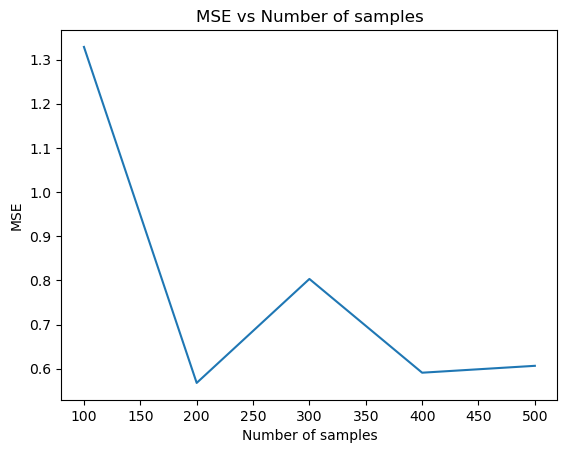

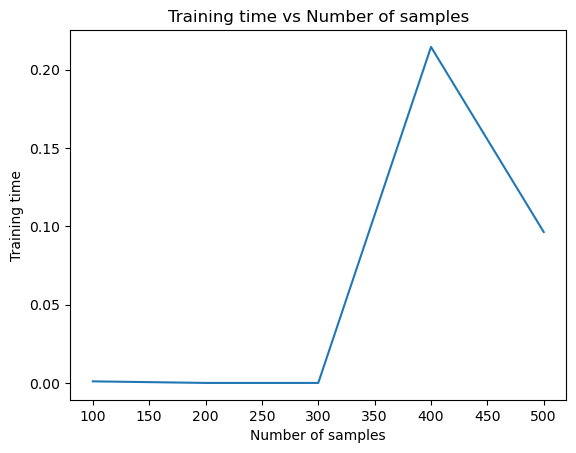

In [6]:
mse = []
train_times = []
for i in range(100, 501, 100):
    X, y = get_random_range(data, i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    reg = LinearRegression()
    start = time.time()
    reg.fit(X_train, y_train)
    train_times.append(time.time() - start)
    y_pred = reg.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(100, 501, 100), mse)
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.title('MSE vs Number of samples')
plt.show()

plt.plot(range(100, 501, 100), train_times)
plt.xlabel('Number of samples')
plt.ylabel('Training time')
plt.title('Training time vs Number of samples')
plt.show()

In [7]:
raise Exception('Stop here')
benchmark_regressor()

Exception: Stop here

In [10]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

# Load the breast cancer dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from linear_model.LogisticRegression import LogisticRegression

# Create a Logistic Regression model
model = sk_LogisticRegression(max_iter=10000)
model2 = LogisticRegression(n_iter=10000)

# Train the model
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict the test set
predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

# convert the predictions to the same format
predictions2 = np.argmax(predictions2, axis=1)

# calculate the accuracy
# print('Accuracy of sklearn:', accuracy_score(y_test, predictions))
# print('Accuracy of sgd:', accuracy_score(y_test, predictions2))

# mse
mse = mean_squared_error(y_test, predictions)
mse2 = mean_squared_error(y_test, predictions2)
print('Mean Squared Error of sklearn:', mse)
print('Mean Squared Error of our model:', mse2)

Mean Squared Error of sklearn: 8225.404494382023
Mean Squared Error of our model: 5594.797752808989


In [28]:
from math import nan
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import time
from linear_model.LogisticRegression import LogisticRegression
import numpy as np


# Load the california housing dataset
data = fetch_california_housing()


# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_regressor():
    mse = []
    train_times = []
    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        reg = LogisticRegression()
        start = time.time()
        reg.fit(X_train, y_train)
        train_times.append(time.time() - start)
        y_pred = reg.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        mse.append(mean_squared_error(y_test, y_pred))
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), mse)
    plt.xlabel('Number of samples')
    plt.ylabel('MSE')
    plt.title('MSE vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), train_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Training time')
    plt.title('Training time vs Number of samples')
    plt.show()




d:\OneDrive - Université Mohammed VI Polytechnique\.S2\CSCI-M123 AI 1 (Data Science)\Project\SKL\mini-sklearn\AAMM_miniml\_testing\..\linear_model\LogisticRegression.py:42: RuntimeWarning: overflow encountered in exp
  return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
d:\OneDrive - Université Mohammed VI Polytechnique\.S2\CSCI-M123 AI 1 (Data Science)\Project\SKL\mini-sklearn\AAMM_miniml\_testing\..\linear_model\LogisticRegression.py:42: RuntimeWarning: invalid value encountered in divide
  return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
d:\OneDrive - Université Mohammed VI Polytechnique\.S2\CSCI-M123 AI 1 (Data Science)\Project\SKL\mini-sklearn\AAMM_miniml\_testing\..\linear_model\LogisticRegression.py:64: RuntimeWarning: divide by zero encountered in log
  return -1 * np.mean(y * np.log(probs))
d:\OneDrive - Université Mohammed VI Polytechnique\.S2\CSCI-M123 AI 1 (Data Science)\Project\SKL\mini-sklearn\AAMM_miniml\_testing\..\linear_model\LogisticRegression.py:64:

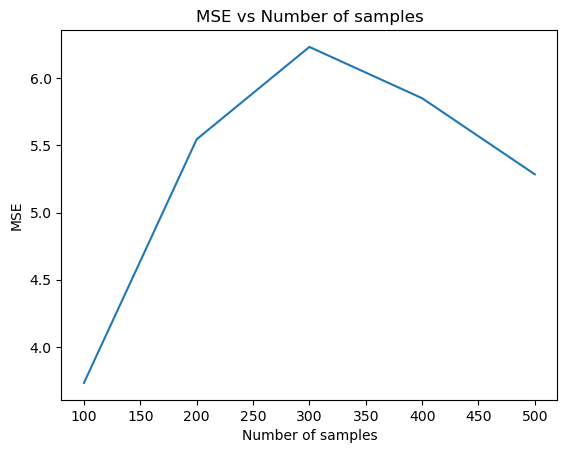

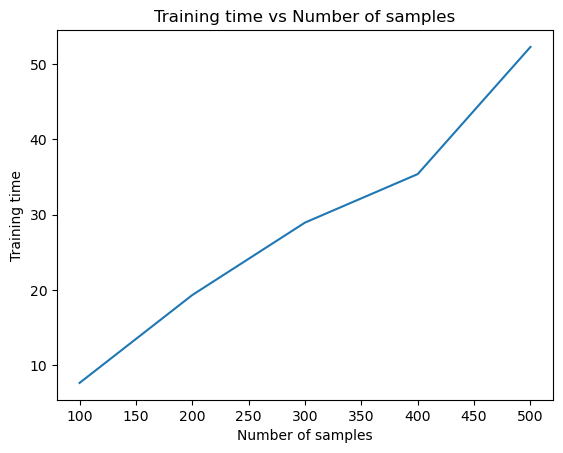

In [29]:
mse = []
train_times = []
for i in range(100, 501, 100):
    X, y = get_random_range(data, i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    reg = LogisticRegression()
    start = time.time()
    reg.fit(X_train, y_train)
    train_times.append(time.time() - start)
    y_pred = reg.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    mse.append(mean_squared_error(y_test, y_pred))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(100, 501, 100), mse)
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.title('MSE vs Number of samples')
plt.show()

plt.plot(range(100, 501, 100), train_times)
plt.xlabel('Number of samples')
plt.ylabel('Training time')
plt.title('Training time vs Number of samples')
plt.show()

In [ ]:
raise Exception('Stop here')
benchmark_regressor()

Exception: Stop here

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.argmax(predictions2, axis=1)

array([1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 0, 0], dtype=int64)